<a href="https://colab.research.google.com/github/baussel/Satellite_Detection/blob/main/Processing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postprocessing and Analysis of Results



---


*Ben Aussel, September 2021, ESA*


---



## Google Drive & Modules

In [1]:
#Mount Google Drive with this Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Modules
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
import glob
import json
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Data post-processing

### ACS

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/ACS_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/ACS_Comp_Raw","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS.csv")

                      filename
0      j59l54010_j59l54geq.jpg
1      j59l54010_j59l54ghq.jpg
2      j59l54010_j59l54gjq.jpg
3      j59l54010_j59l54grq.jpg
4      j59l54010_j59l54gwq.jpg
...                        ...
78205  jegr01010_jegr01pzq.jpg
78206  jegr01010_jegr01q1q.jpg
78207  jegr01010_jegr01q3q.jpg
78208  jehc75010_jehc75pwq.jpg
78209  jehc75010_jehc75q1q.jpg

[78210 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_ACS.loc[data_ACS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS_params.csv")

  0%|                                                                                        | 0/78210 [00:00<?, ?it/s]<ipython-input-18-e33c7287f418>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 78210/78210 [09:48<00:00, 132.89it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/ACS/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Results/processed/ACS\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed.csv")

                     filename
0     j6fl1e010_j6fl1elvq.jpg
1     j6fl23010_j6fl23pyq.jpg
2     j6fl6c010_j6fl6cilq.jpg
3     j6fl6x020_j6fl6xfuq.jpg
4     j6fl7b010_j6fl7bpoq.jpg
...                       ...
2573  jeex02020_jeex02qaq.jpg
2574  jeex02020_jeex02rvq.jpg
2575  jeex03010_jeex03p8q.jpg
2576  jeex03010_jeex03puq.jpg
2577  jeexa4010_jeexa4idq.jpg

[2578 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_ACS.loc[data_ACS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed_params.csv")

  0%|                                                                                         | 0/2578 [00:00<?, ?it/s]<ipython-input-24-be660f706a59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|█████████████████████████████████████████████████████████████████████████████| 2578/2578 [00:19<00:00, 132.50it/s]


### WFC3/UVIS

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_UVIS_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_UVIS_Comp_Raw\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3.csv")

                      filename
0      ia2l51030_ia2l51ukq.jpg
1      ia2l51030_ia2l51urq.jpg
2      ia2l51030_ia2l51uwq.jpg
3      ia2l52030_ia2l52srq.jpg
4      ia2l52030_ia2l52svq.jpg
...                        ...
61514  iejc02010_iejc02kpq.jpg
61515  iejc02010_iejc02kqq.jpg
61516  iejc02010_iejc02krq.jpg
61517  iejc02010_iejc02ksq.jpg
61518  iejc02010_iejc02ktq.jpg

[61519 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_WFC3_UVIS.loc[data_WFC3_UVIS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3_params.csv")

  0%|                                                                                        | 0/61519 [00:00<?, ?it/s]<ipython-input-20-68dd9fe9c197>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 61519/61519 [07:16<00:00, 141.04it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/WFC3/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Results/processed/WFC3\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed.csv")

                    filename
0    ib1f31020_ib1f31e9q.jpg
1    ib1f32020_ib1f32uzq.jpg
2    ib1f33010_ib1f33q8q.jpg
3    ib1f35010_ib1f35igq.jpg
4    ib1f36030_ib1f36aqq.jpg
..                       ...
835  ieh807010_ieh807blq.jpg
836  ieh807020_ieh807bmq.jpg
837  ieh807020_ieh807bnq.jpg
838  iehh02010_iehh02rjq.jpg
839  iej501040_iej501snq.jpg

[840 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_WFC3_UVIS.loc[data_WFC3_UVIS["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed_params.csv")

  0%|                                                                                          | 0/840 [00:00<?, ?it/s]<ipython-input-35-44bdfa9fa666>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████████| 840/840 [00:03<00:00, 225.61it/s]


### WFC3/IR

#### All Images

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_IR_Comp_Raw/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/WFC3_IR_Comp_Raw\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR.csv")

                      filename
0      i9zf01010_i9zf01dzq.jpg
1      i9zf01010_i9zf01e0q.jpg
2      i9zf01010_i9zf01e1q.jpg
3      i9zf01010_i9zf01e3q.jpg
4      i9zf02010_i9zf02z6q.jpg
...                        ...
84684  iejm02010_iejm02doq.jpg
84685  iejm02020_iejm02dfq.jpg
84686  iejm02020_iejm02djq.jpg
84687  iejm02020_iejm02dmq.jpg
84688  iejm02020_iejm02dqq.jpg

[84689 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_IR.loc[data_IR["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR_params.csv")

  0%|                                                                                        | 0/84689 [00:00<?, ?it/s]<ipython-input-5-197c658a39bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████| 84689/84689 [09:16<00:00, 152.10it/s]


#### Images with satellite trails

In [ ]:
#Get filenames after deleting
filenames = glob.glob("/content/drive/MyDrive/ESA/Results/processed/IR/*")
for i in range(len(filenames)):
    filenames[i] = filenames[i].replace("Results/processed/IR\\","")
data_satellites = pd.DataFrame(filenames,columns=["filename"])
print(data_satellites)
data_satellites.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed.csv")

                    filename
0    i9zf03010_i9zf03gcq.jpg
1    i9zf13010_i9zf13chq.jpg
2    i9zg01010_i9zg01g2q.jpg
3    ia1e27010_ia1e27kbq.jpg
4    ia1l76010_ia1l76lqq.jpg
..                       ...
646  iedwa7010_iedwa7d7q.jpg
647  iedwan010_iedwano6q.jpg
648  ieel83020_ieel83afq.jpg
649  ieer01010_ieer01g1q.jpg
650  iejm02010_iejm02dkq.jpg

[651 rows x 1 columns]


In [ ]:
results = []
for i in tqdm(range(len(data_satellites))):
    row = data_satellites[i:i+1]
    name = row["filename"].to_numpy()[0].split(".")[0]
    obs_id, raw_id = name.split("_")[0], name.split("_")[1]
    data_row = data_IR.loc[data_IR["observation_id"]==raw_id]
    data_row["composite_id"] = obs_id
    results.append(data_row)
data_result = pd.concat(results)
data_result.to_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed_params.csv")

  0%|                                                                                          | 0/651 [00:00<?, ?it/s]<ipython-input-9-f4f3af4f0e87>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_row["composite_id"] = obs_id
100%|███████████████████████████████████████████████████████████████████████████████| 651/651 [00:05<00:00, 118.39it/s]


## Analysis

### Import of Data

In [3]:
data_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_ACS_params.csv")
data_WFC3_UVIS = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_WFC3_params.csv")
data_IR = pd.read_csv("/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/all_IR_params_images.csv")

In [4]:
data_sats_ACS = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_ACS_processed_params.csv")
data_sats_WFC3_UVIS = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_WFC3_processed_params.csv")
data_sats_IR = pd.read_csv("/content/drive/MyDrive/ESA/Results/processed/satellites_IR_processed_params.csv")

In [5]:
bins_mjd = [52275,52640,53005,53371,53736,54101,54466,54832,55197,55562,55927,56293,56658,57023,57388,57754,58119,58484,58849,59215,59580]
years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

### Fraction

In [6]:
#ACS
total_number_sats_ACS = len(data_sats_ACS) #Number of trails
total_number_images_ACS = len(data_ACS) #Number of images
frac_ACS = total_number_sats_ACS/total_number_images_ACS
u_frac_ACS = np.sqrt(total_number_sats_ACS/total_number_images_ACS**2+total_number_sats_ACS**2/total_number_images_ACS**3)
print("Fraction of images with satellite trails for ACS: {:.4f} +- {:.4f}".format(frac_ACS,u_frac_ACS))

Fraction of images with satellite trails for ACS: 0.0330 +- 0.0007


In [7]:
#WFC3/UVIS
total_number_sats_WFC3_UVIS = len(data_sats_WFC3_UVIS) #Number of trails
total_number_images_WFC3_UVIS = len(data_WFC3_UVIS) #Number of images
frac_WFC3_UVIS = total_number_sats_WFC3_UVIS/total_number_images_WFC3_UVIS
u_frac_WFC3_UVIS = np.sqrt(total_number_sats_WFC3_UVIS/total_number_images_WFC3_UVIS**2+total_number_sats_WFC3_UVIS**2/total_number_images_WFC3_UVIS**3)
print("Fraction of images with satellite trails for WFC3_UVIS: {:.4f} +- {:.4f}".format(frac_WFC3_UVIS,u_frac_WFC3_UVIS))

Fraction of images with satellite trails for WFC3_UVIS: 0.0137 +- 0.0005


In [8]:
#WFC3/IR
total_number_sats_IR = len(data_sats_IR) #Number of trails
total_number_images_IR = len(data_IR) #Number of images
frac_IR = total_number_sats_IR/total_number_images_IR
u_frac_IR = np.sqrt(total_number_sats_IR/total_number_images_IR**2+total_number_sats_IR**2/total_number_images_IR**3)
print("Fraction of images with satellite trails for IR: {:.4f} +- {:.4f}".format(frac_IR,u_frac_IR))

Fraction of images with satellite trails for IR: 0.0105 +- 0.0004


### Plots for different years

#### All images



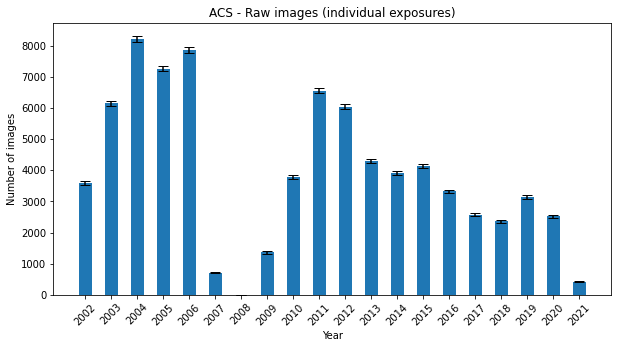

In [63]:
#ACS
hist_ACS = np.histogram(data_ACS["start_time_mjd"],bins=bins_mjd)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,hist_ACS[0],yerr=np.sqrt(hist_ACS[0]), width=0.5,capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_all_images_years.png",dpi=100)

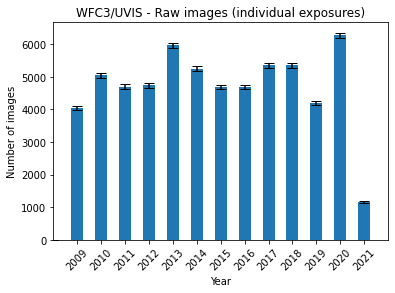

In [64]:
#WFC3/UVIS
hist_WFC3 = np.histogram(data_WFC3_UVIS["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,hist_WFC3[0], width=0.5, yerr=np.sqrt(hist_WFC3[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_all_images_years.png",dpi=100)

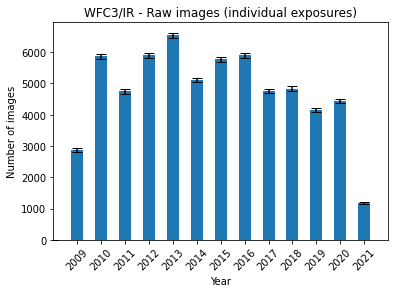

In [65]:
#WFC3/IR
hist_IR = np.histogram(data_IR["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,hist_IR[0], width=0.5, yerr=np.sqrt(hist_IR[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_all_images_years.png",dpi=100)

#### Images with satellite trails

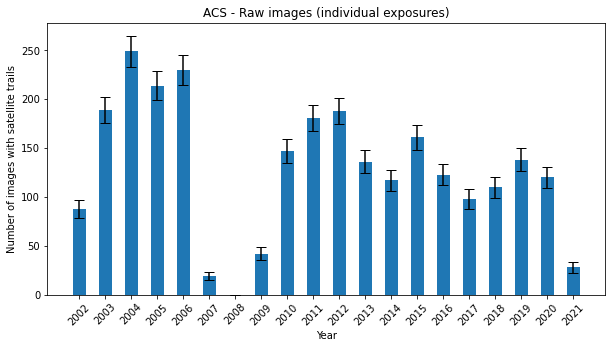

In [66]:
#ACS
hist_sats_ACS = np.histogram(data_sats_ACS["start_time_mjd"],bins=bins_mjd)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,hist_sats_ACS[0], width=0.5, yerr=np.sqrt(hist_sats_ACS[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_images_satellites_years.png",dpi=100)

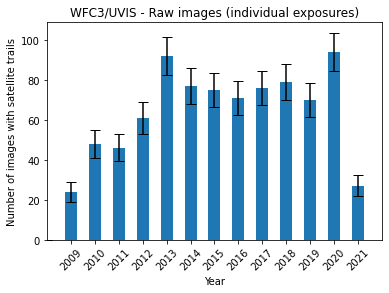

In [67]:
#WFC3/UVIS
hist_sats_WFC3 = np.histogram(data_sats_WFC3_UVIS["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,hist_sats_WFC3[0], width=0.5, yerr=np.sqrt(hist_sats_WFC3[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_images_satellites_years.png",dpi=100)

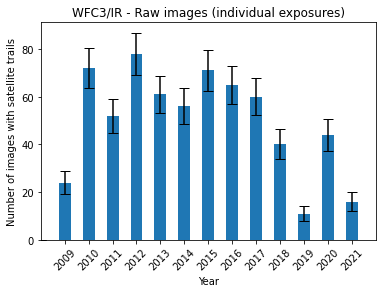

In [68]:
#WFC3/IR
hist_sats_IR = np.histogram(data_sats_IR["start_time_mjd"],bins=bins_mjd)

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,hist_sats_IR[0], width=0.5, yerr=np.sqrt(hist_sats_IR[0]),capsize=5)
plt.xlabel("Year")
plt.ylabel("Number of images with satellite trails")
plt.xticks(years[7:],rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_images_satellites_years.png",dpi=100)

#### Fraction of images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


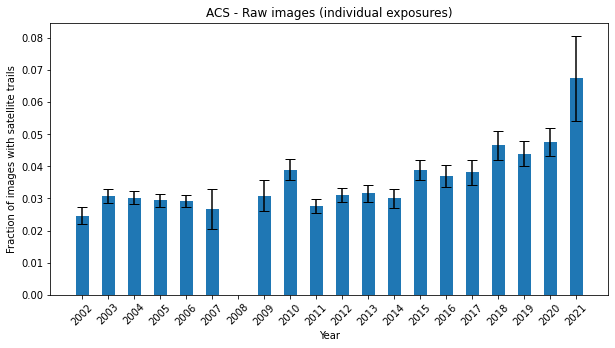

In [69]:
#ACS
fraction_ACS = hist_sats_ACS[0]/hist_ACS[0]
u_fraction_ACS = np.sqrt(hist_sats_ACS[0]/(hist_ACS[0]**2)+(hist_sats_ACS[0]**2/(hist_ACS[0]**3)))

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,fraction_ACS, width=0.5, yerr=u_fraction_ACS,capsize=5)
plt.xlabel("Year")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_years.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


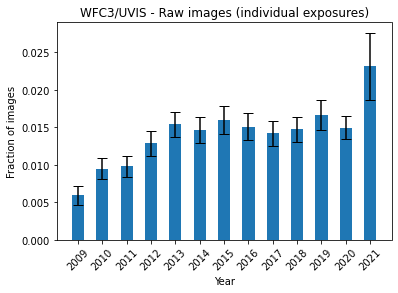

In [70]:
#WFC3/UVIS
fraction_WFC3 = hist_sats_WFC3[0]/hist_WFC3[0]
u_fraction_WFC3 = np.sqrt(hist_sats_WFC3[0]/(hist_WFC3[0]**2)+(hist_sats_WFC3[0]**2/(hist_WFC3[0]**3)))

plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(years,fraction_WFC3, width=0.5, yerr=u_fraction_WFC3,capsize=5)
plt.xlabel("Year")
plt.ylabel("Fraction of images")
plt.xticks(years[7:],rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_fraction_years.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


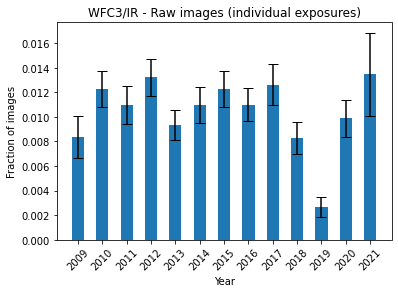

In [71]:
#WFC3/IR
fraction_IR = hist_sats_IR[0]/hist_IR[0]
u_fraction_IR = np.sqrt(hist_sats_IR[0]/(hist_IR[0]**2)+(hist_sats_IR[0]**2/(hist_IR[0]**3)))

plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(years,fraction_IR, width=0.5, yerr=u_fraction_IR,capsize=5)
plt.xlabel("Year")
plt.ylabel("Fraction of images")
plt.xticks(years[7:],rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_years.png",dpi=100)

#### Normalization

In [72]:
#all images
total_exp_time_ACS = data_ACS["start_time_mjd"].sum() #Sum of exposure time
total_number_sats_ACS = len(data_sats_ACS) #Number of trails
total_trails_per_second_ACS = total_number_sats_ACS/total_exp_time_ACS
total_mean_fov_ACS = np.mean(data_sats_ACS["fov_size"])/np.sqrt(2)
total_norm_trails_per_second_ACS = total_trails_per_second_ACS/total_mean_fov_ACS
u_total_norm_trails_per_second_ACS = np.sqrt(total_number_sats_ACS)/(total_exp_time_ACS*total_mean_fov_ACS)
print("Normalized trails per second ACS: ({:.3e} +- {:.2e}) 1/(s °)".format(total_norm_trails_per_second_ACS,u_total_norm_trails_per_second_ACS))

Normalized trails per second ACS: (1.052e-05 +- 2.07e-07) 1/(s °)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


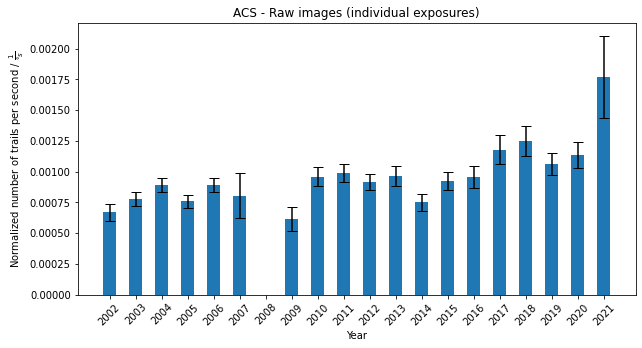

In [73]:
#Sum of exposure time
hist_ACS_exp = np.histogram(data_ACS["start_time_mjd"],bins=bins_mjd,weights=data_ACS["exposure_duration"])

#Number of trails per second
trails_per_second_ACS = hist_sats_ACS[0]/hist_ACS_exp[0]

#Mean FOV size in degrees (for images with satellites)
fov_sats_ACS = np.histogram(data_sats_ACS["start_time_mjd"],bins=bins_mjd,weights=data_sats_ACS["fov_size"])[0]/(hist_sats_ACS[0]*np.sqrt(2))

#Divide by FOV size
norm_sats_ACS = trails_per_second_ACS/fov_sats_ACS
u_norm_sats_ACS = np.sqrt(hist_sats_ACS[0])/(hist_ACS_exp[0]*fov_sats_ACS)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(years,norm_sats_ACS, width=0.5, yerr=u_norm_sats_ACS,capsize=5)
plt.xlabel("Year")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_years_norm.png",dpi=100)

In [74]:
 #all images
total_exp_time_WFC3_UVIS = data_WFC3_UVIS["start_time_mjd"].sum() #Sum of exposure time
total_number_sats_WFC3_UVIS = len(data_sats_WFC3_UVIS) #Number of trails
total_trails_per_second_WFC3_UVIS = total_number_sats_WFC3_UVIS/total_exp_time_WFC3_UVIS
total_mean_fov_WFC3_UVIS = np.mean(data_sats_WFC3_UVIS["fov_size"])/np.sqrt(2)
total_norm_trails_per_second_WFC3_UVIS = total_trails_per_second_WFC3_UVIS/total_mean_fov_WFC3_UVIS
u_total_norm_trails_per_second_WFC3_UVIS = np.sqrt(total_number_sats_WFC3_UVIS)/(total_exp_time_WFC3_UVIS*total_mean_fov_WFC3_UVIS)
print("Normalized trails per second WFC3_UVIS: ({:.3e} +- {:.2e}) 1/(s °)".format(total_norm_trails_per_second_WFC3_UVIS,u_total_norm_trails_per_second_WFC3_UVIS))

Normalized trails per second WFC3_UVIS: (5.697e-06 +- 1.97e-07) 1/(s °)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


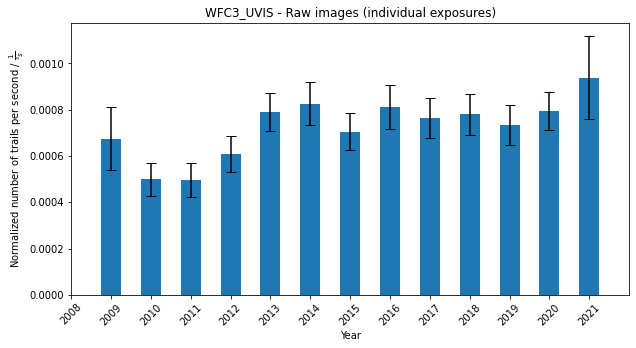

In [75]:
#Sum of exposure time
hist_WFC3_UVIS_exp = np.histogram(data_WFC3_UVIS["start_time_mjd"],bins=bins_mjd,weights=data_WFC3_UVIS["exposure_duration"])

#Number of trails per second
trails_per_second_WFC3_UVIS = hist_sats_WFC3[0]/hist_WFC3_UVIS_exp[0]

#Mean FOV size in degrees (for images with satellites)
fov_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS["start_time_mjd"],bins=bins_mjd,weights=data_sats_WFC3_UVIS["fov_size"])[0]/(hist_sats_WFC3[0]*np.sqrt(2))

#Divide by FOV size
norm_sats_WFC3_UVIS = trails_per_second_WFC3_UVIS/fov_sats_WFC3_UVIS
u_norm_sats_WFC3_UVIS = np.sqrt(hist_sats_WFC3[0])/(hist_WFC3_UVIS_exp[0]*fov_sats_WFC3_UVIS)

plt.figure(figsize=(10,5))
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.bar(years,norm_sats_WFC3_UVIS, width=0.5,yerr=u_norm_sats_WFC3_UVIS,capsize=5)
plt.xlabel("Year")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(years,rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_years_norm.png",dpi=100)

In [76]:
#all images
total_exp_time_IR = data_IR["start_time_mjd"].sum() #Sum of exposure time
total_number_sats_IR = len(data_sats_IR) #Number of trails
total_trails_per_second_IR = total_number_sats_IR/total_exp_time_IR
total_mean_fov_IR = np.mean(data_sats_IR["fov_size"])/np.sqrt(2)
total_norm_trails_per_second_IR = total_trails_per_second_IR/total_mean_fov_IR
u_total_norm_trails_per_second_IR = np.sqrt(total_number_sats_IR)/(total_exp_time_IR*total_mean_fov_IR)
print("Normalized trails per second IR: ({:.3e} +- {:.2e}) 1/(s °)".format(total_norm_trails_per_second_IR,u_total_norm_trails_per_second_IR))

Normalized trails per second IR: (5.142e-06 +- 2.02e-07) 1/(s °)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


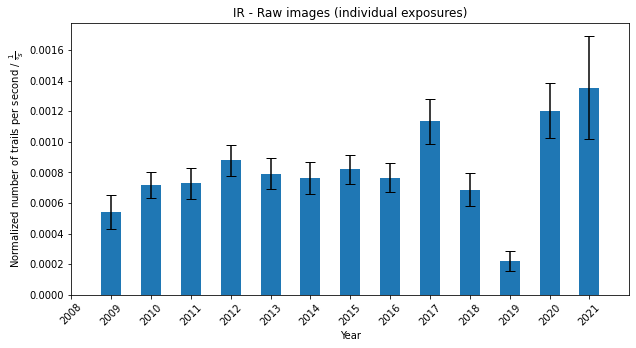

In [77]:
#Sum of exposure time
hist_IR_exp = np.histogram(data_IR["start_time_mjd"],bins=bins_mjd,weights=data_IR["exposure_duration"])

#Number of trails per second
trails_per_second_IR = hist_sats_IR[0]/hist_IR_exp[0]

#Mean FOV size in degrees (for images with satellites)
fov_sats_IR = np.histogram(data_sats_IR["start_time_mjd"],bins=bins_mjd,weights=data_sats_IR["fov_size"])[0]/(hist_sats_IR[0]*np.sqrt(2))

#Divide by FOV size
norm_sats_IR = trails_per_second_IR/fov_sats_IR
u_norm_sats_IR = np.sqrt(hist_sats_IR[0])/(hist_IR_exp[0]*fov_sats_IR)

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(years,norm_sats_IR, width=0.5,yerr=u_norm_sats_IR,capsize=5)
plt.xlabel("Year")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(years,rotation=45)
plt.xlim(2008,2022)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_years_norm.png",dpi=100)

### Plots for month 2020/2021

In [78]:
bins_months = [58849,58880,58909,58940,58970,59001,59031,59062,59093,59123,59154,59184,59215,59246,59274,59305,59335,59366,59396,59427,59458,59488]
months = ["01/20","02/20","03/20","04/20","05/20","06/20","07/20","08/20","09/20","10/20","11/20","12/20","01/21","02/21","03/21","04/21","05/21","06/21","07/21","08/21","09/21"]

#bins_months = [58849,58940,59031,59123,59215,59305,59396,59488]
#months = ["01/20","04/20","07/20","10/20","01/21","04/21","07/21"]

#### All images

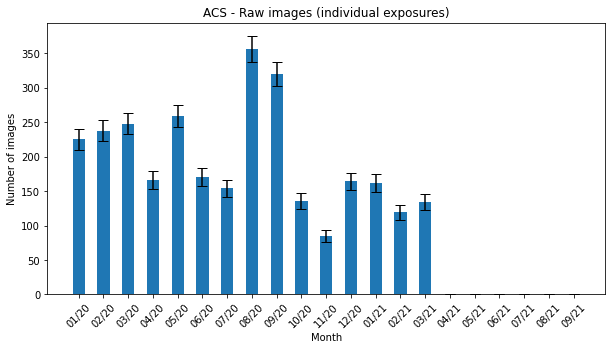

In [79]:
#ACS
data_ACS_months = data_ACS[data_ACS["start_time_mjd"] > 58849]
hist_ACS_months = np.histogram(data_ACS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,hist_ACS_months[0], width=0.5, yerr=np.sqrt(hist_ACS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_all_images_months.png",dpi=100)

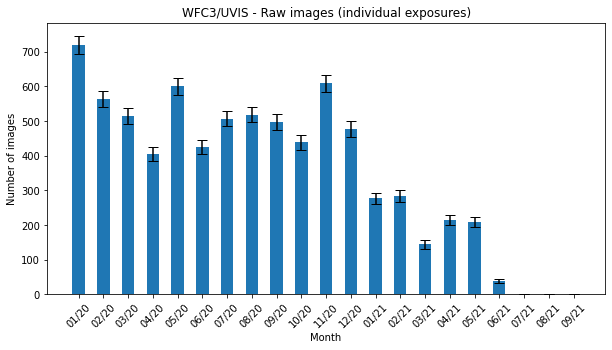

In [80]:
#WFC3/UVIS
data_WFC3_UVIS_months = data_WFC3_UVIS[data_WFC3_UVIS["start_time_mjd"] > 58849]
hist_WFC3_UVIS_months = np.histogram(data_WFC3_UVIS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(months,hist_WFC3_UVIS_months[0], width=0.5, yerr=np.sqrt(hist_WFC3_UVIS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_all_images_months.png",dpi=100)

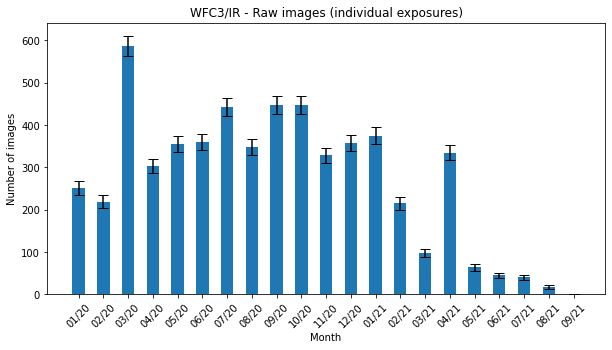

In [81]:
#WFC3/IR
data_IR_months = data_IR[data_IR["start_time_mjd"] > 58849]
hist_IR_months = np.histogram(data_IR_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("WFC3/IR - Raw images (individual exposures)")
plt.bar(months,hist_IR_months[0], width=0.5, yerr=np.sqrt(hist_IR_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_all_images_months.png",dpi=100)

#### Images with satellite trails

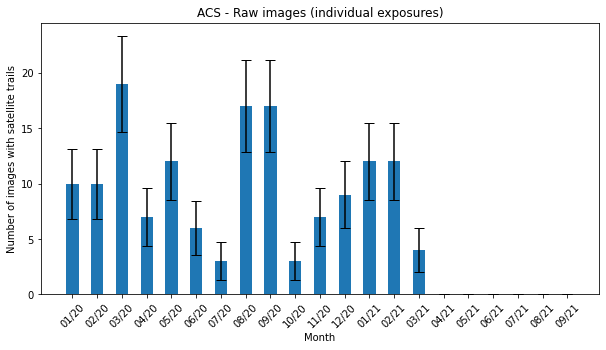

In [82]:
#ACS
data_sats_ACS_months = data_sats_ACS[data_sats_ACS["start_time_mjd"] > 58849]
hist_sats_ACS_months = np.histogram(data_sats_ACS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,hist_sats_ACS_months[0], width=0.5, yerr=np.sqrt(hist_sats_ACS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_images_satellites_months.png",dpi=100)

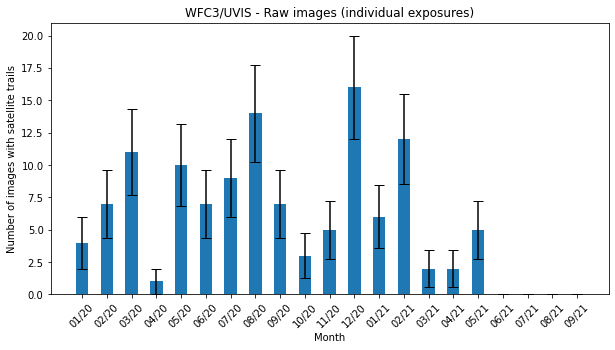

In [83]:
#WFC3_UVIS
data_sats_WFC3_UVIS_months = data_sats_WFC3_UVIS[data_sats_WFC3_UVIS["start_time_mjd"] > 58849]
hist_sats_WFC3_UVIS_months = np.histogram(data_sats_WFC3_UVIS_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(months,hist_sats_WFC3_UVIS_months[0], width=0.5, yerr=np.sqrt(hist_sats_WFC3_UVIS_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_images_satellites_months.png",dpi=100)

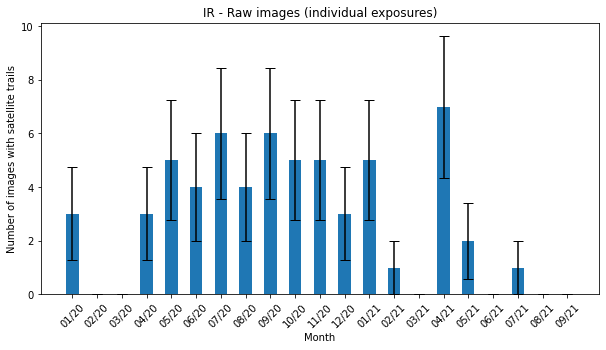

In [84]:
#IR
data_sats_IR_months = data_sats_IR[data_sats_IR["start_time_mjd"] > 58849]
hist_sats_IR_months = np.histogram(data_sats_IR_months["start_time_mjd"],bins=bins_months)

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(months,hist_sats_IR_months[0], width=0.5, yerr=np.sqrt(hist_sats_IR_months[0]),capsize=5)
plt.xlabel("Month")
plt.ylabel("Number of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_images_satellites_months.png",dpi=100)

#### Fraction of images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


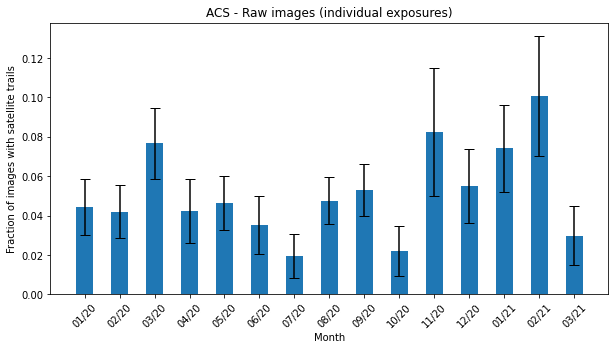

In [85]:
#ACS
fraction_ACS_months = hist_sats_ACS_months[0]/hist_ACS_months[0]
u_fraction_ACS_months = np.sqrt(hist_sats_ACS_months[0]/(hist_ACS_months[0]**2)+(hist_sats_ACS_months[0]**2/(hist_ACS_months[0]**3)))

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,fraction_ACS_months, width=0.5, yerr=u_fraction_ACS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_months.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


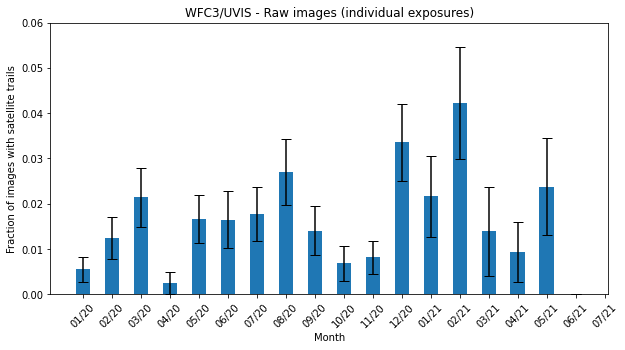

In [86]:
#WFC3_UVIS
fraction_WFC3_UVIS_months = hist_sats_WFC3_UVIS_months[0]/hist_WFC3_UVIS_months[0]
u_fraction_WFC3_UVIS_months = np.sqrt(hist_sats_WFC3_UVIS_months[0]/(hist_WFC3_UVIS_months[0]**2)+(hist_sats_WFC3_UVIS_months[0]**2/(hist_WFC3_UVIS_months[0]**3)))

plt.figure(figsize=(10,5))
plt.title("WFC3/UVIS - Raw images (individual exposures)")
plt.bar(months,fraction_WFC3_UVIS_months, width=0.5, yerr=u_fraction_WFC3_UVIS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(rotation=45)
plt.ylim(0,0.06)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_fraction_months.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


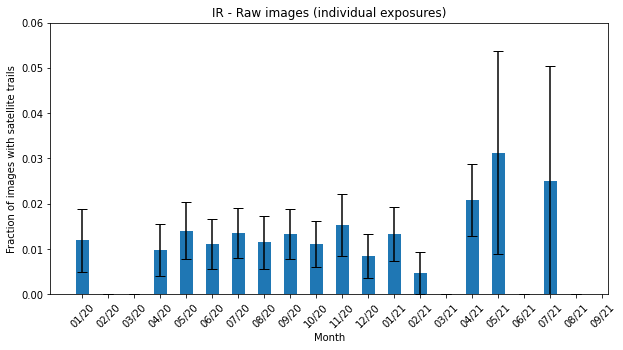

In [87]:
#IR
fraction_IR_months = hist_sats_IR_months[0]/hist_IR_months[0]
u_fraction_IR_months = np.sqrt(hist_sats_IR_months[0]/(hist_IR_months[0]**2)+(hist_sats_IR_months[0]**2/(hist_IR_months[0]**3)))

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(months,fraction_IR_months, width=0.5, yerr=u_fraction_IR_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Fraction of images with satellite trails")
plt.xticks(rotation=45)
plt.ylim(0,0.06)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_months.png",dpi=100)

#### Normalization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


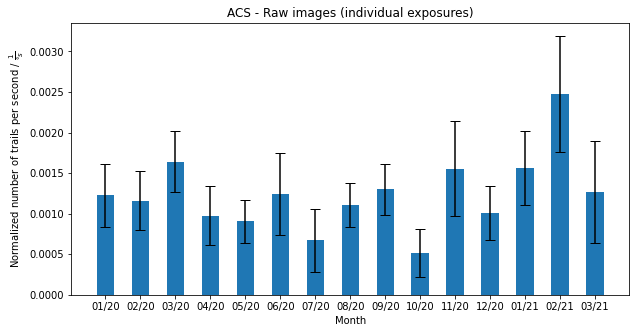

In [88]:
#Sum of exposure time
hist_ACS_exp_months = np.histogram(data_ACS_months["start_time_mjd"],bins=bins_months,weights=data_ACS_months["exposure_duration"])

#Number of trails per second
trails_per_second_ACS_months = hist_sats_ACS_months[0]/hist_ACS_exp_months[0]

#Mean FOV size in degrees (for images with satellites)
fov_sats_ACS_months = np.histogram(data_sats_ACS_months["start_time_mjd"],bins=bins_months,weights=data_sats_ACS_months["fov_size"])[0]/(hist_sats_ACS_months[0]*np.sqrt(2))

#Divide by FOV size
norm_sats_ACS_months = trails_per_second_ACS_months/fov_sats_ACS_months
u_norm_sats_ACS_months = np.sqrt(hist_sats_ACS_months[0])/(hist_ACS_exp_months[0]*fov_sats_ACS_months)

plt.figure(figsize=(10,5))
plt.title("ACS - Raw images (individual exposures)")
plt.bar(months,norm_sats_ACS_months, width=0.5, yerr=u_norm_sats_ACS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
#plt.xticks(years,rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_month_norm.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


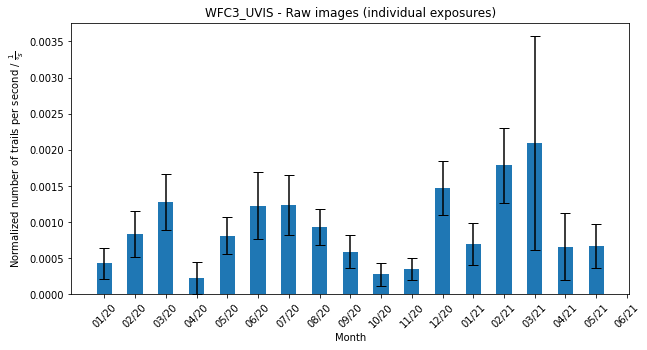

In [89]:
#Sum of exposure time
hist_WFC3_UVIS_exp_months = np.histogram(data_WFC3_UVIS_months["start_time_mjd"],bins=bins_months,weights=data_WFC3_UVIS_months["exposure_duration"])

#Number of trails per second
trails_per_second_WFC3_UVIS_months = hist_sats_WFC3_UVIS_months[0]/hist_WFC3_UVIS_exp_months[0]

#Mean FOV size in degrees (for images with satellites)
fov_sats_WFC3_UVIS_months = np.histogram(data_sats_WFC3_UVIS_months["start_time_mjd"],bins=bins_months,weights=data_sats_WFC3_UVIS_months["fov_size"])[0]/(hist_sats_WFC3_UVIS_months[0]*np.sqrt(2))

#Divide by FOV size
norm_sats_WFC3_UVIS_months = trails_per_second_WFC3_UVIS_months/fov_sats_WFC3_UVIS_months
u_norm_sats_WFC3_UVIS_months = np.sqrt(hist_sats_WFC3_UVIS_months[0])/(hist_WFC3_UVIS_exp_months[0]*fov_sats_WFC3_UVIS_months)

plt.figure(figsize=(10,5))
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.bar(months,norm_sats_WFC3_UVIS_months, width=0.5, yerr=u_norm_sats_WFC3_UVIS_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_month_norm.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


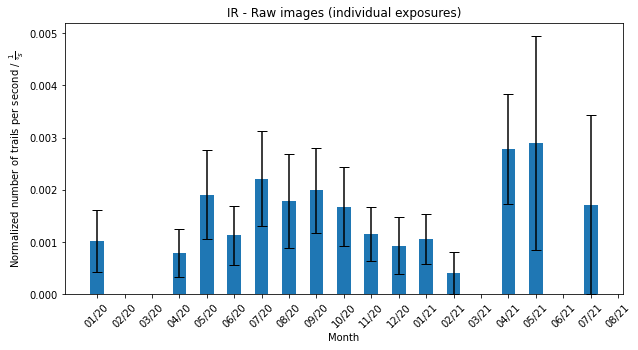

In [90]:
#Sum of exposure time
hist_IR_exp_months = np.histogram(data_IR_months["start_time_mjd"],bins=bins_months,weights=data_IR_months["exposure_duration"])

#Number of trails per second
trails_per_second_IR_months = hist_sats_IR_months[0]/hist_IR_exp_months[0]

#Mean FOV size in degrees (for images with satellites)
fov_sats_IR_months = np.histogram(data_sats_IR_months["start_time_mjd"],bins=bins_months,weights=data_sats_IR_months["fov_size"])[0]/(hist_sats_IR_months[0]*np.sqrt(2))

#Divide by FOV size
norm_sats_IR_months = trails_per_second_IR_months/fov_sats_IR_months
u_norm_sats_IR_months = np.sqrt(hist_sats_IR_months[0])/(hist_IR_exp_months[0]*fov_sats_IR_months)

plt.figure(figsize=(10,5))
plt.title("IR - Raw images (individual exposures)")
plt.bar(months,norm_sats_IR_months, width=0.5, yerr=u_norm_sats_IR_months,capsize=5)
plt.xlabel("Month")
plt.ylabel("Normalized number of trails per second / $\\frac{1}{° s}$")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_month_norm.png",dpi=100)

### Other parameters

#### Exposure Time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


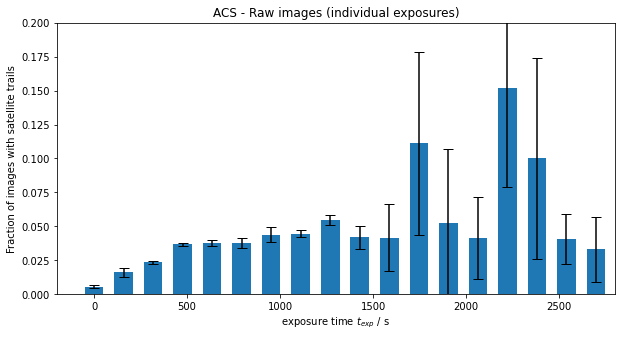

In [149]:
#ACS
exp_hist_ACS = np.histogram(data_ACS["exposure_duration"],bins=80)
exp_hist_sats_ACS = np.histogram(data_sats_ACS["exposure_duration"],bins=exp_hist_ACS[1])
fraction_exp_ACS = exp_hist_sats_ACS[0]/exp_hist_ACS[0]
u_fraction_exp_ACS = np.sqrt(exp_hist_sats_ACS[0]/(exp_hist_ACS[0]**2)+(exp_hist_sats_ACS[0]**2/(exp_hist_ACS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(exp_hist_ACS[1][:-1],fraction_exp_ACS,width=100, yerr=u_fraction_exp_ACS,capsize=5)
plt.xlim(-200,2800) #Some images with longer exposure times
plt.ylim(0,0.2)
plt.xlabel("exposure time $t_{exp}$ / s")
plt.ylabel("Fraction of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_exp.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


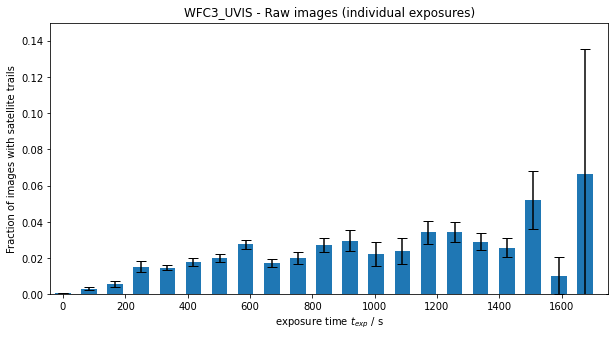

In [122]:
#WFC3_UVIS
exp_hist_WFC3_UVIS = np.histogram(data_WFC3_UVIS["exposure_duration"],bins=40)
exp_hist_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS["exposure_duration"],bins=exp_hist_WFC3_UVIS[1])
fraction_exp_WFC3_UVIS = exp_hist_sats_WFC3_UVIS[0]/exp_hist_WFC3_UVIS[0]
u_fraction_exp_WFC3_UVIS = np.sqrt(exp_hist_sats_WFC3_UVIS[0]/(exp_hist_WFC3_UVIS[0]**2)+(exp_hist_sats_WFC3_UVIS[0]**2/(exp_hist_WFC3_UVIS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(exp_hist_WFC3_UVIS[1][:-1],fraction_exp_WFC3_UVIS,width=50, yerr=u_fraction_exp_WFC3_UVIS,capsize=5)
plt.xlim(-40,1750) #Some images with longer exposure times
plt.ylim(0,0.15)
plt.xlabel("exposure time $t_{exp}$ / s")
plt.ylabel("Fraction of images with satellite trails")
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_exp.png",dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


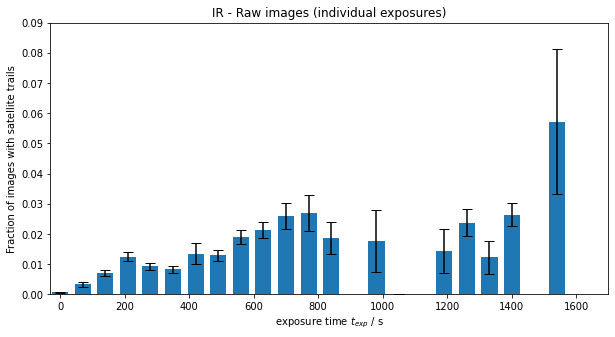

In [123]:
#IR
exp_hist_IR = np.histogram(data_IR["exposure_duration"],bins=40)
exp_hist_sats_IR = np.histogram(data_sats_IR["exposure_duration"],bins=exp_hist_IR[1])
fraction_exp_IR = exp_hist_sats_IR[0]/exp_hist_IR[0]
u_fraction_exp_IR = np.sqrt(exp_hist_sats_IR[0]/(exp_hist_IR[0]**2)+(exp_hist_sats_IR[0]**2/(exp_hist_IR[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(exp_hist_IR[1][:-1],fraction_exp_IR,width=50, yerr=u_fraction_exp_IR,capsize=5)
plt.xlim(-30,1700) #Some images with longer exposure times
plt.ylim(0,0.09)
plt.xlabel("exposure time $t_{exp}$ / s")
plt.ylabel("Fraction of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_exp.png",dpi=100)

#### RA

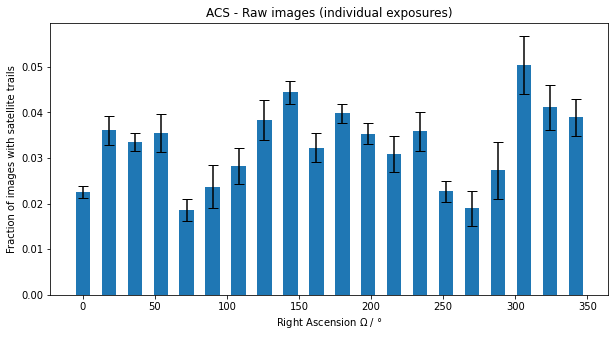

In [134]:
#ACS
ra_hist_ACS = np.histogram(data_ACS["ra"],bins=20)
ra_hist_sats_ACS = np.histogram(data_sats_ACS["ra"],bins=ra_hist_ACS[1])
fraction_ra_ACS = ra_hist_sats_ACS[0]/ra_hist_ACS[0]
u_fraction_ra_ACS = np.sqrt(ra_hist_sats_ACS[0]/(ra_hist_ACS[0]**2)+(ra_hist_sats_ACS[0]**2/(ra_hist_ACS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(ra_hist_ACS[1][:-1],fraction_ra_ACS,width=10, yerr=u_fraction_ra_ACS,capsize=5)
plt.xlabel("Right Ascension $\Omega$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_ra.png",dpi=100)

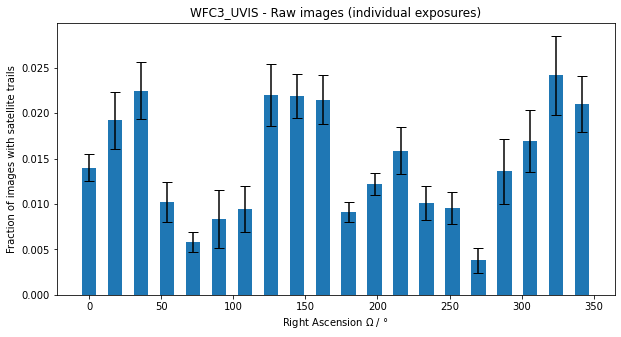

In [135]:
#WFC3_UVIS
ra_hist_WFC3_UVIS = np.histogram(data_WFC3_UVIS["ra"],bins=20)
ra_hist_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS["ra"],bins=ra_hist_WFC3_UVIS[1])
fraction_ra_WFC3_UVIS = ra_hist_sats_WFC3_UVIS[0]/ra_hist_WFC3_UVIS[0]
u_fraction_ra_WFC3_UVIS = np.sqrt(ra_hist_sats_WFC3_UVIS[0]/(ra_hist_WFC3_UVIS[0]**2)+(ra_hist_sats_WFC3_UVIS[0]**2/(ra_hist_WFC3_UVIS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(ra_hist_WFC3_UVIS[1][:-1],fraction_ra_WFC3_UVIS,width=10, yerr=u_fraction_ra_WFC3_UVIS,capsize=5)
plt.xlabel("Right Ascension $\Omega$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_ra.png",dpi=100)

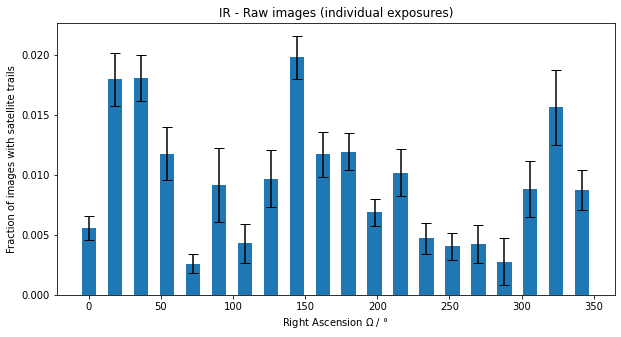

In [136]:
#IR
ra_hist_IR = np.histogram(data_IR["ra"],bins=20)
ra_hist_sats_IR = np.histogram(data_sats_IR["ra"],bins=ra_hist_IR[1])
fraction_ra_IR = ra_hist_sats_IR[0]/ra_hist_IR[0]
u_fraction_ra_IR = np.sqrt(ra_hist_sats_IR[0]/(ra_hist_IR[0]**2)+(ra_hist_sats_IR[0]**2/(ra_hist_IR[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(ra_hist_IR[1][:-1],fraction_ra_IR,width=10, yerr=u_fraction_ra_IR,capsize=5)
plt.xlabel("Right Ascension $\Omega$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/IR_fraction_ra.png",dpi=100)

#### Dec

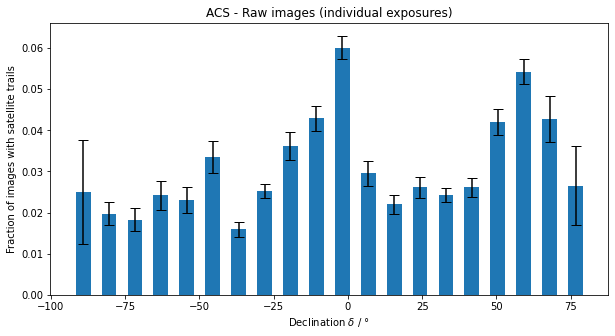

In [144]:
#ACS
dec_hist_ACS = np.histogram(data_ACS["dec"],bins=20)
dec_hist_sats_ACS = np.histogram(data_sats_ACS["dec"],bins=dec_hist_ACS[1])
fraction_dec_ACS = dec_hist_sats_ACS[0]/dec_hist_ACS[0]
u_fraction_dec_ACS = np.sqrt(dec_hist_sats_ACS[0]/(dec_hist_ACS[0]**2)+(dec_hist_sats_ACS[0]**2/(dec_hist_ACS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(dec_hist_ACS[1][:-1],fraction_dec_ACS,width=5, yerr=u_fraction_dec_ACS,capsize=5)
plt.xlabel("Declination $\delta$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("ACS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/ACS_fraction_dec.png",dpi=100)

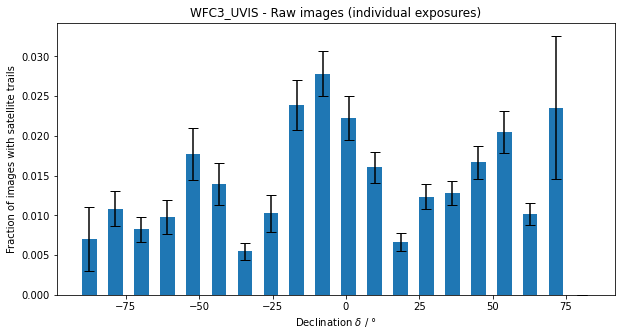

In [145]:
#WFC3_UVIS
dec_hist_WFC3_UVIS = np.histogram(data_WFC3_UVIS["dec"],bins=20)
dec_hist_sats_WFC3_UVIS = np.histogram(data_sats_WFC3_UVIS["dec"],bins=dec_hist_WFC3_UVIS[1])
fraction_dec_WFC3_UVIS = dec_hist_sats_WFC3_UVIS[0]/dec_hist_WFC3_UVIS[0]
u_fraction_dec_WFC3_UVIS = np.sqrt(dec_hist_sats_WFC3_UVIS[0]/(dec_hist_WFC3_UVIS[0]**2)+(dec_hist_sats_WFC3_UVIS[0]**2/(dec_hist_WFC3_UVIS[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(dec_hist_WFC3_UVIS[1][:-1],fraction_dec_WFC3_UVIS,width=5, yerr=u_fraction_dec_WFC3_UVIS,capsize=5)
plt.xlabel("Declination $\delta$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("WFC3_UVIS - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_dec.png",dpi=100)

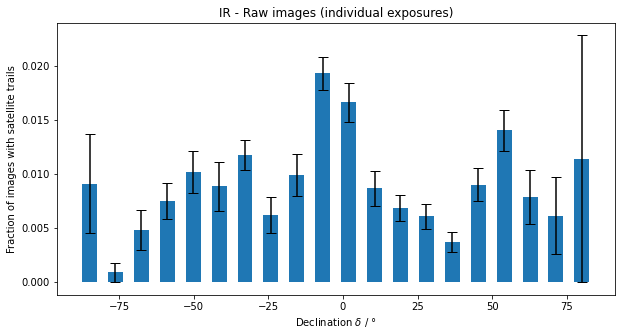

In [146]:
#IR
dec_hist_IR = np.histogram(data_IR["dec"],bins=20)
dec_hist_sats_IR = np.histogram(data_sats_IR["dec"],bins=dec_hist_IR[1])
fraction_dec_IR = dec_hist_sats_IR[0]/dec_hist_IR[0]
u_fraction_dec_IR = np.sqrt(dec_hist_sats_IR[0]/(dec_hist_IR[0]**2)+(dec_hist_sats_IR[0]**2/(dec_hist_IR[0]**3)))
plt.figure(figsize=(10,5))
plt.bar(dec_hist_IR[1][:-1],fraction_dec_IR,width=5, yerr=u_fraction_dec_IR,capsize=5)
plt.xlabel("Declination $\delta$ / °")
plt.ylabel("Fraction of images with satellite trails")
plt.title("IR - Raw images (individual exposures)")
plt.savefig("/content/drive/MyDrive/ESA/Results/processed/plots/WFC3_UVIS_fraction_dec.png",dpi=100)